In [1]:
from sectionproperties.analysis import Section
from sectionproperties.pre import CompoundGeometry
from sectionproperties.pre.library import rectangular_section
import pyvista as pv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib widget
#pv.set_jupyter_backend('trame')
pv.set_jupyter_backend('static')
pv.global_theme.colorbar_orientation = 'vertical'

## Obdélník

In [3]:
h= 200
b = 140
geom = rectangular_section(d=h, b=b)
#geom.plot_geometry()

geom.create_mesh(mesh_sizes=10)

sec = Section(geometry=geom)
#sec.plot_mesh(materials=False)

sec.calculate_geometric_properties()
sec.calculate_warping_properties()
#sec.calculate_plastic_properties()

In [4]:
#sec.display_results(fmt="g")

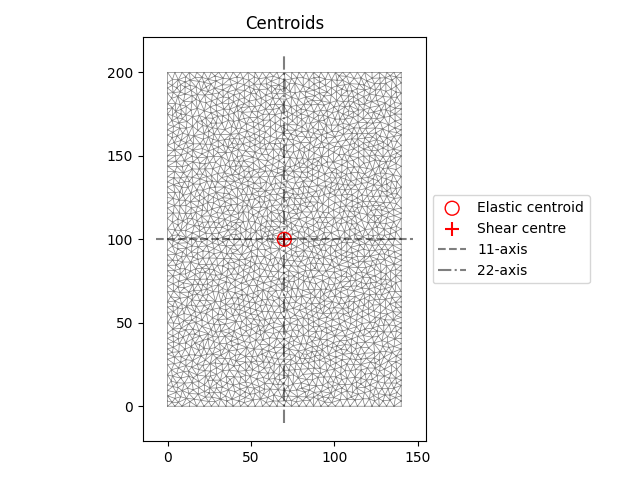

<Axes: title={'center': 'Centroids'}>

In [5]:
sec.plot_centroids()

In [6]:
Vy = 7.5e3
case1 = sec.calculate_stress(myy=0, vy=Vy, mzz=0)

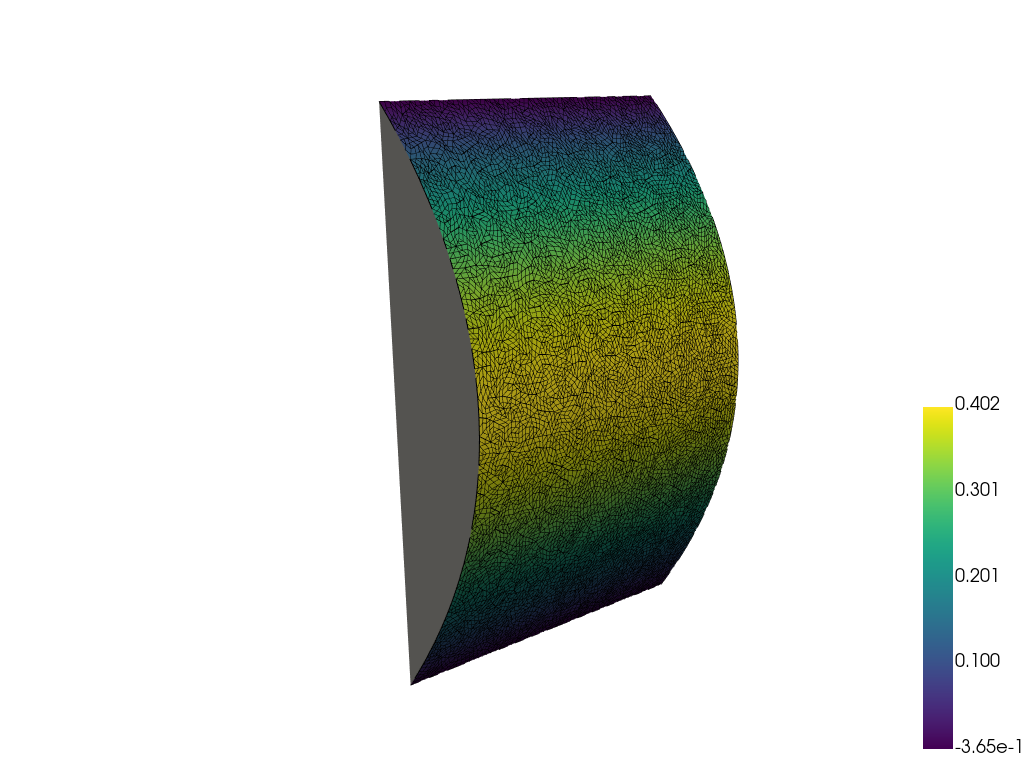

In [7]:
vertices = geom.mesh['vertices']
vertices = np.hstack((vertices, np.zeros((vertices.shape[0], 1))))
triangles = geom.mesh['triangles']
triangles = np.hstack((np.ones((triangles.shape[0], 1)) * 6, triangles)).astype(int)

point_cloud1 = pv.PolyData(vertices, triangles)
vertices2 = vertices.copy()

s = case1.get_stress()[0]["sig_zy_vy"]#case1.get_stress()[0]["sig_zx_vy"]#
vertices2[:, -1] += s * 100
point_cloud2 = pv.PolyData(vertices2, triangles)
point_cloud2['stress'] = s

z = vertices[:, 1].copy()
cz = -sec.get_c()[1]
z -= sec.get_c()[1]

Sy = b/8*(h**2-4*z**2)
Iy = sec.get_ic()[0]
tau = Vy * Sy / Iy / b
vertices3 = vertices.copy()
vertices3[:, -1] += tau * 100
point_cloud3 = pv.PolyData(vertices3, triangles)
point_cloud3['stress'] = tau

pl = pv.Plotter()
pl.add_mesh(point_cloud1, color='grey', render_points_as_spheres=True)
pl.add_mesh(point_cloud2, color='black', style='wireframe')
pl.add_mesh(point_cloud3, scalars=tau, render_points_as_spheres=True)

pl.camera_position = [(-309.3239134228143, 190.9448824743177, 361.0875938420543),
 (261.84846177303075, 45.81828788132555, -203.1925420629693),
 (0.15391266219003122, 0.98330165885624, -0.09710169982108453)]

pl.show()

## Tenkostěnný T-profil

In [8]:
# list of points describing the geometry
points = [
    (0, 0),  # bottom plate
    (0, -20),
    (93, -20),
    (93, -220),
    (107, -220),  # inverted angle section
    (107, -20),
    (200, -20),
    (200, 0),
]

# list of facets (edges) describing the geometry connectivity
facets = [
    (0, 1),  # bottom plate
    (1, 2),
    (2, 3),
    (3, 4),
    (4, 5),  # inverted angle section
    (5, 6),
    (6, 7),
    (7, 0),
]

# list of control points (points within each region)
control_points = [
    (100, -10),  # bottom plate
]

geom = CompoundGeometry.from_points(
    points=points,
    facets=facets,
    control_points=control_points,
)
#geom.plot_geometry()

geom.create_mesh(mesh_sizes=5)

sec = Section(geometry=geom)
#sec.plot_mesh(materials=False)

sec.calculate_geometric_properties()
sec.calculate_warping_properties()
#sec.calculate_plastic_properties()

/home/kelidas/anaconda3/lib/python3.11/site-packages/sectionproperties/analysis/section.py:342: UserWarning: 
The section geometry contains disjoint regions which is invalid for warping analysis.
 Please revise your geometry to ensure there is connectivity between all regions.
 Please see https://sectionproperties.rtfd.io/en/stable/user_guide/analysis.html#warping-analysis for more information.
  warnings.warn(msg)


In [9]:
#sec.display_results(fmt="g")

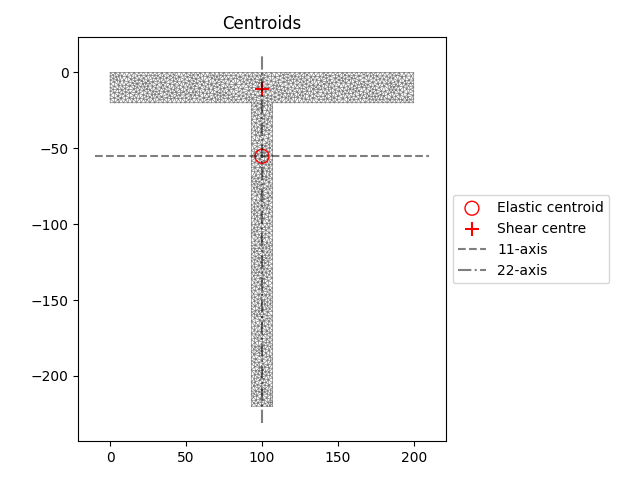

<Axes: title={'center': 'Centroids'}>

In [10]:
sec.plot_centroids()

In [11]:
Vy = 20.4e3
case1 = sec.calculate_stress(myy=0, vy=Vy, mzz=0)

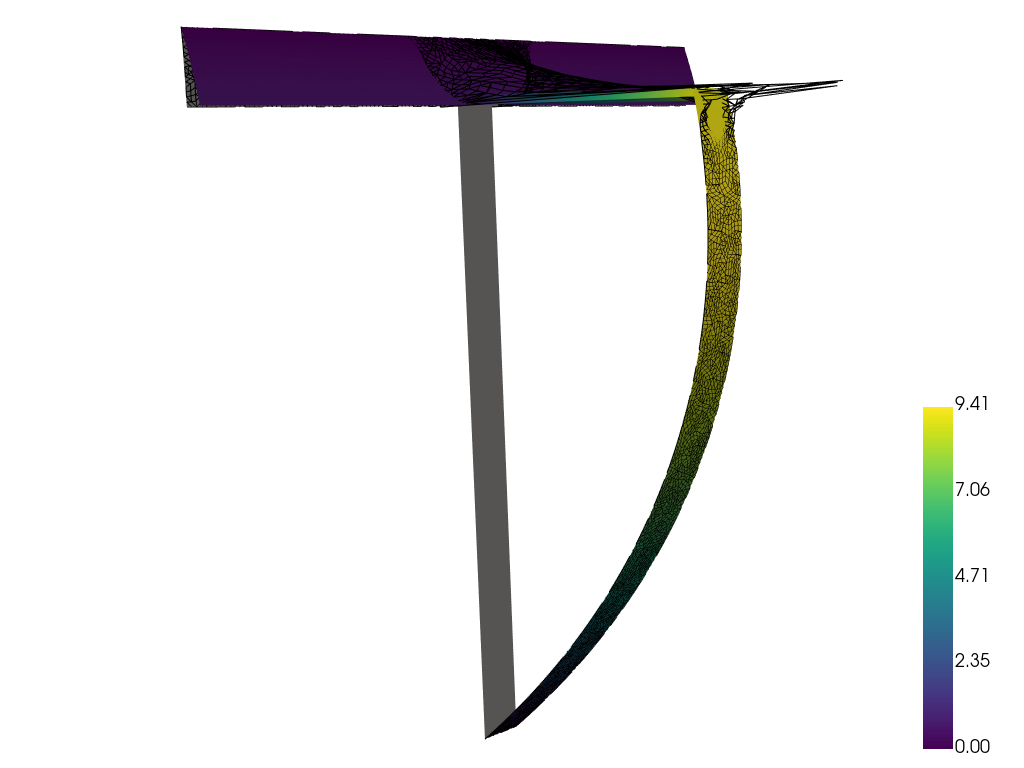

In [12]:
vertices = geom.mesh['vertices']
vertices = np.hstack((vertices, np.zeros((vertices.shape[0], 1))))
triangles = geom.mesh['triangles']
triangles = np.hstack((np.ones((triangles.shape[0], 1)) * 6, triangles)).astype(int)

point_cloud1 = pv.PolyData(vertices, triangles)
vertices2 = vertices.copy()

s = case1.get_stress()[0]["sig_zy_vy"]# case1.get_stress()[0]["sig_zx_vy"]#
vertices2[:, -1] += s * 10
point_cloud2 = pv.PolyData(vertices2, triangles)
point_cloud2['stress'] = s

z = vertices[:, 1].copy()
cz = -sec.get_c()[1]
z -= sec.get_c()[1]

Sy = np.piecewise(z, [z < cz-20, z >= cz-20], 
                     [lambda z: 14 * (220-cz-z)*(z+(220-cz-z)/2), lambda z: 200 * (cz-z)*(z+(cz-z)/2)])
b = np.piecewise(z, [z < cz-20, z >= cz-20], [14, 200])
Iy = sec.get_ic()[0]
tau = Vy * Sy / Iy / b
vertices3 = vertices.copy()
vertices3[:, -1] += tau * 10
point_cloud3 = pv.PolyData(vertices3, triangles)
point_cloud3['stress'] = tau

pl = pv.Plotter()
pl.add_mesh(point_cloud1, color='grey')
pl.add_mesh(point_cloud2, color='black', style='wireframe')
pl.add_mesh(point_cloud3, scalars=tau)

pl.camera_position = [(-199.30013399531435, -36.66875777935179, 326.2037228028328),
 (259.9128540923312, -140.46951776126153, -156.53727430301635),
 (0.1336815291017418, 0.9873603532801041, -0.08513977653017402)]

pl.show()

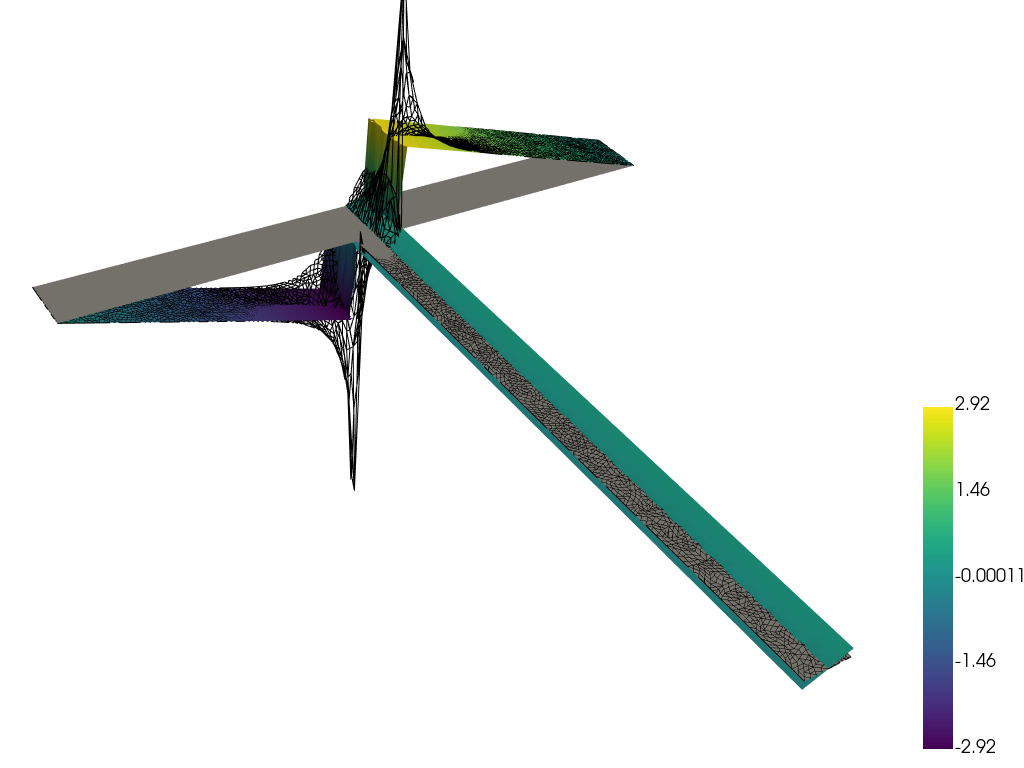

In [13]:
vertices2 = vertices.copy()

s = case1.get_stress()[0]["sig_zx_vy"]#
vertices2[:, -1] += s * 10
point_cloud2 = pv.PolyData(vertices2, triangles)
point_cloud2['stress'] = s

y = vertices[:, 0].copy()
cy = -sec.get_c()[0]
y -= sec.get_c()[0]

Sy = np.piecewise(y, [np.abs(y) <= 7.001, np.abs(y) > 7.001], 
                     [lambda y: np.sign(y) * (20*97*45.3 - 220*(7-np.abs(y))*(220-cz-110)), 
                      lambda y: np.sign(y) * 20 * (100 - np.abs(y)) * 45.3])
b = np.piecewise(y, [np.abs(y) <= 7.001, np.abs(y) > 7.001], [220, 20])
Iy = sec.get_ic()[0]
tau = Vy * Sy / Iy / b
vertices3 = vertices.copy()
vertices3[:, -1] += tau * 10
point_cloud3 = pv.PolyData(vertices3, triangles)
point_cloud3['stress'] = tau

pl = pv.Plotter()
pl.add_mesh(point_cloud1, color='grey')
pl.add_mesh(point_cloud2, color='black', style='wireframe')
pl.add_mesh(point_cloud3, scalars=tau)

pl.camera_position = [(-88.74457503697933, -347.27526468172596, 234.16736488824841),
 (131.0598001968331, -54.53108530018472, -45.30202484123396),
 (0.28883362133137525, 0.5386898578344923, 0.7914470141802661)]

pl.show()

## Masivní T-profil

In [14]:
# list of points describing the geometry
points = [
    (0, 0),  # bottom plate
    (0, -450),
    (150, -450),
    (150, -900),
    (450, -900),  # inverted angle section
    (450, -450),
    (600, -450),
    (600, 0),
]

# list of facets (edges) describing the geometry connectivity
facets = [
    (0, 1),  # bottom plate
    (1, 2),
    (2, 3),
    (3, 4),
    (4, 5),  # inverted angle section
    (5, 6),
    (6, 7),
    (7, 0),
]

# list of control points (points within each region)
control_points = [
    (300, -300),  # bottom plate
]

geom = CompoundGeometry.from_points(
    points=points,
    facets=facets,
    control_points=control_points,
)
#geom.plot_geometry()

geom.create_mesh(mesh_sizes=[100, 100])

sec = Section(geometry=geom)
#sec.plot_mesh(materials=False)

sec.calculate_geometric_properties()
sec.calculate_warping_properties()
#sec.calculate_plastic_properties()

/home/kelidas/anaconda3/lib/python3.11/site-packages/sectionproperties/analysis/section.py:342: UserWarning: 
The section geometry contains disjoint regions which is invalid for warping analysis.
 Please revise your geometry to ensure there is connectivity between all regions.
 Please see https://sectionproperties.rtfd.io/en/stable/user_guide/analysis.html#warping-analysis for more information.
  warnings.warn(msg)


In [15]:
#sec.display_results(fmt="g")

In [16]:
Vy = 100e3
case1 = sec.calculate_stress(myy=0, vy=Vy, mzz=0)

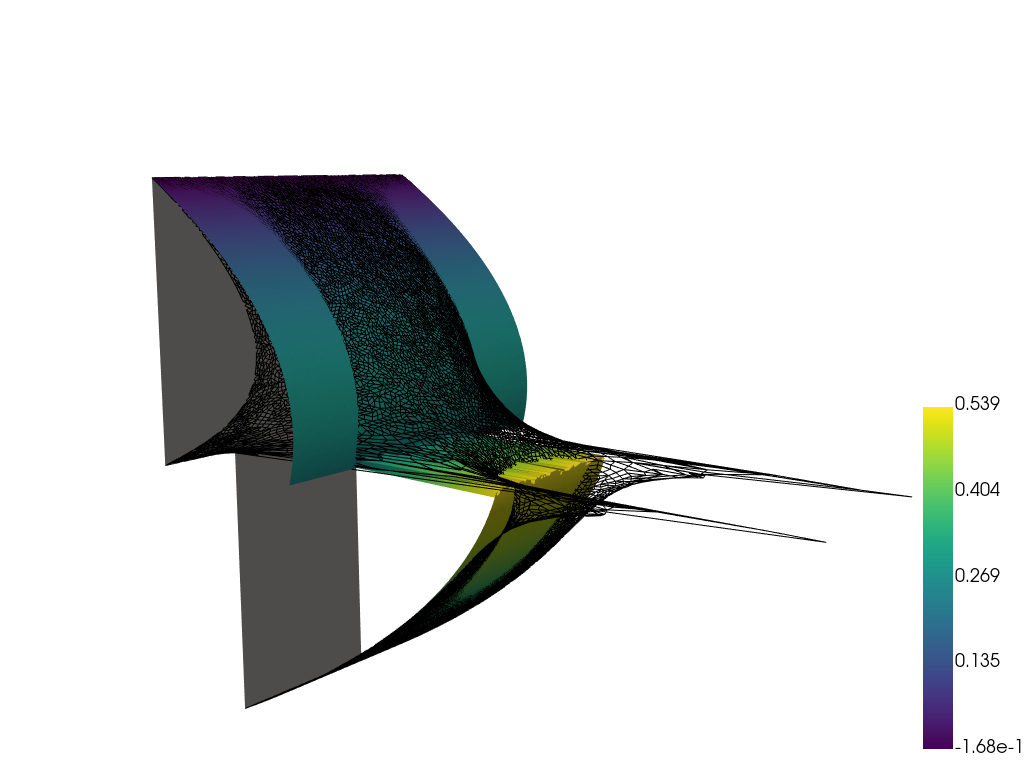

In [17]:
vertices = geom.mesh['vertices']
vertices = np.hstack((vertices, np.zeros((vertices.shape[0], 1))))
triangles = geom.mesh['triangles']
triangles = np.hstack((np.ones((triangles.shape[0], 1)) * 6, triangles)).astype(int)

point_cloud1 = pv.PolyData(vertices, triangles)
vertices2 = vertices.copy()

s = case1.get_stress()[0]["sig_zy_vy"] #case1.get_stress()[0]["sig_zx_vy"] #
vertices2[:, -1] += s * 1000
point_cloud2 = pv.PolyData(vertices2, triangles)
point_cloud2['stress'] = s

z = vertices[:, 1].copy()
z -= sec.get_c()[1]
Sy = np.piecewise(z, [z < -75, z >= -75], 
                     [lambda z: 41343750 - 150 * z**2, lambda z: 42187500 - 300 * z**2])
b = np.piecewise(z, [z < -75, z >= -75], [300, 600])
Iy = sec.get_ic()[0]
tau = Vy * Sy / Iy / b
vertices3 = vertices.copy()
vertices3[:, -1] += tau * 1000
point_cloud3 = pv.PolyData(vertices3, triangles)
point_cloud3['stress'] = tau

pl = pv.Plotter()
pl.add_mesh(point_cloud1, color='grey', render_points_as_spheres=True)
pl.add_mesh(point_cloud2, color='black', style='wireframe')
pl.add_mesh(point_cloud3, scalars=tau, render_points_as_spheres=True)
pl.camera_position = [(-1492.5835903137763, 5.469422687531562, 1733.8967445658122),
(1000.0, -450.0, -37.05604637849842),
(0.1539126621900312, 0.9833016588562399, -0.09710169982108452)]
pl.show()

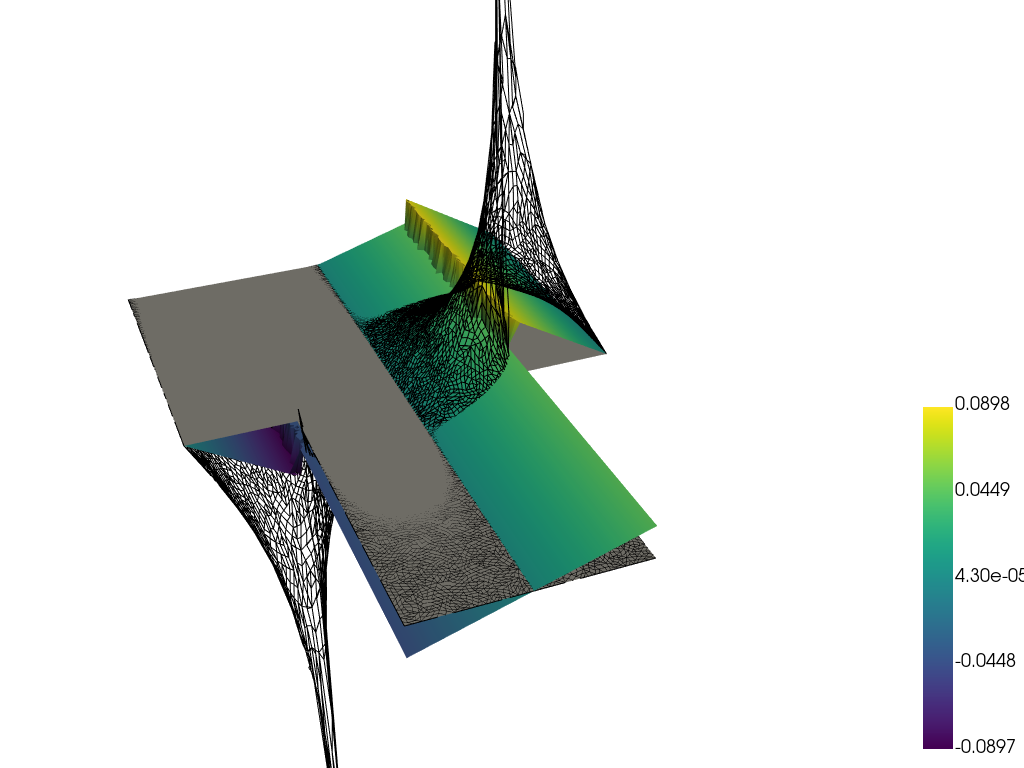

In [18]:
vertices2 = vertices.copy()

s = case1.get_stress()[0]["sig_zx_vy"]#
vertices2[:, -1] += s * 1000
point_cloud2 = pv.PolyData(vertices2, triangles)
point_cloud2['stress'] = s

y = vertices[:, 0].copy()
cy = -sec.get_c()[0]
y -= sec.get_c()[0]

Sy = np.piecewise(y, [np.abs(y) <= 150.001, np.abs(y) > 150.001], 
                     [lambda y: np.sign(y) * (450 * 150*(375 - 450/2) - 900*(150-np.abs(y))*(525-450)), 
                      lambda y: np.sign(y) * 450 * (300 - np.abs(y)) * (375 - 450/2)])
b = np.piecewise(y, [np.abs(y) <= 150.001, np.abs(y) > 150.001], [900, 450])
Iy = sec.get_ic()[0]
tau = Vy * Sy / Iy / b
vertices3 = vertices.copy()
vertices3[:, -1] += tau * 1000
point_cloud3 = pv.PolyData(vertices3, triangles)
point_cloud3['stress'] = tau

pl = pv.Plotter()
pl.add_mesh(point_cloud1, color='grey')
pl.add_mesh(point_cloud2, color='black', style='wireframe')
pl.add_mesh(point_cloud3, scalars=tau)

pl.camera_position = [(-171.00248862748055, -2050.8806760414295, 998.0425044099172),
 (493.0925936826432, -353.0273570487186, -76.59563868599477),
 (0.20409194311270598, 0.4653180646682513, 0.8612929684200801)]

pl.show()

## Obdélníkový s otvorem

In [25]:
h= 300
b = 200
rect = rectangular_section(d=h, b=b)
rect_hole = rectangular_section(d=240, b=150)
rect_hole = rect_hole.shift_section(x_offset=25, y_offset=40)
geom = rect - rect_hole

geom.create_mesh(mesh_sizes=10)

sec = Section(geometry=geom)
#sec.plot_mesh(materials=False)

sec.calculate_geometric_properties()
sec.calculate_warping_properties()
#sec.calculate_plastic_properties()

In [26]:
#sec.display_results(fmt="g")

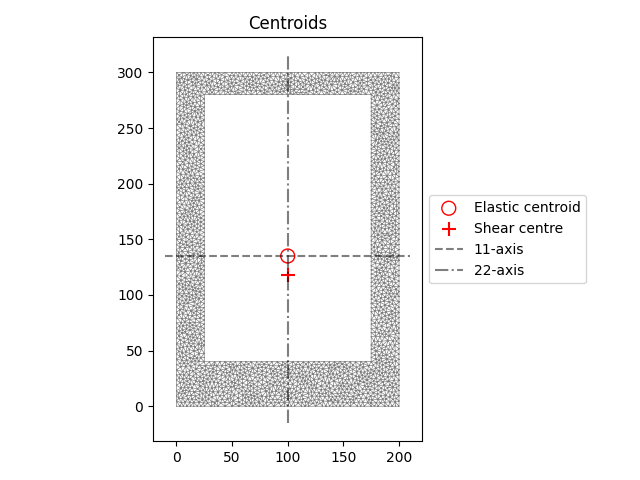

<Axes: title={'center': 'Centroids'}>

In [27]:
sec.plot_centroids()

In [28]:
Vy = 4e3
case1 = sec.calculate_stress(myy=0, vy=Vy, mzz=0)

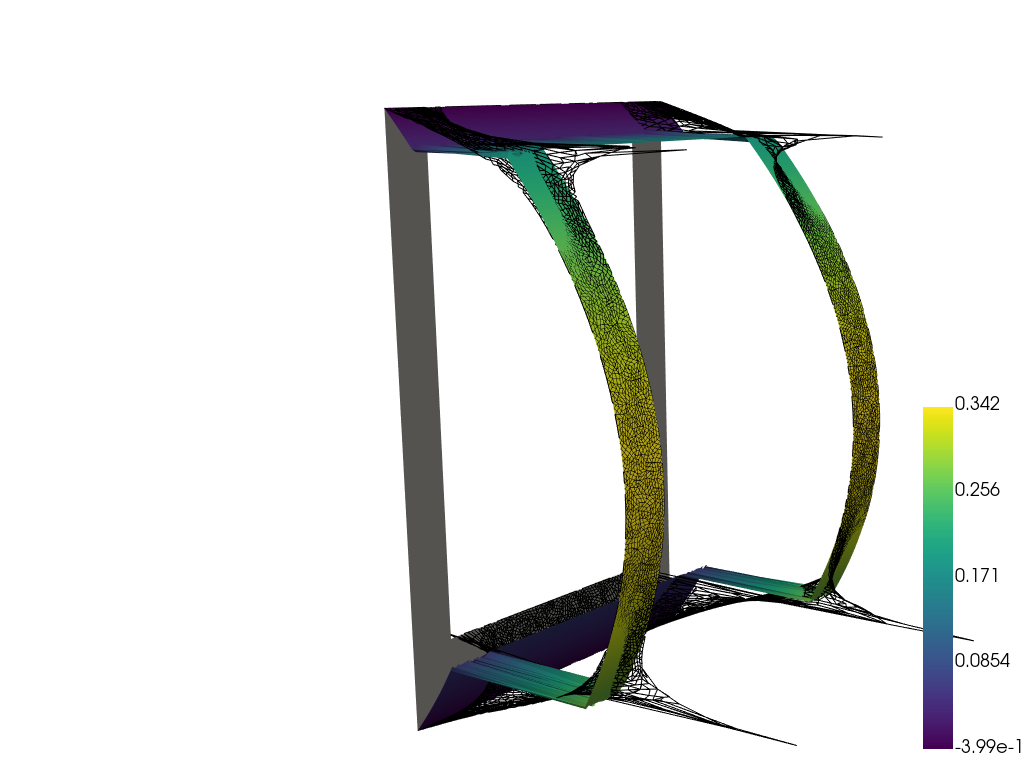

In [29]:
vertices = geom.mesh['vertices']
vertices = np.hstack((vertices, np.zeros((vertices.shape[0], 1))))
triangles = geom.mesh['triangles']
triangles = np.hstack((np.ones((triangles.shape[0], 1)) * 6, triangles)).astype(int)

point_cloud1 = pv.PolyData(vertices, triangles)
vertices2 = vertices.copy()

s = case1.get_stress()[0]["sig_zy_vy"]#case1.get_stress()[0]["sig_zx_vy"]#
vertices2[:, -1] += s * 400
point_cloud2 = pv.PolyData(vertices2, triangles)
point_cloud2['stress'] = s

z = vertices[:, 1].copy()
cz = -sec.get_c()[1]
z -= sec.get_c()[1]

z = vertices[:, 1].copy()
z -= sec.get_c()[1]
Sy = np.piecewise(z, [z < -95, (z >= -95) & (z < 145), z >= 145], 
                     [lambda z: (1822500 - 100 * z**2),
                      lambda z: (1145625 - 25 * z**2),
                      lambda z: (2722500 - 100 * z**2)])
b = np.piecewise(z, [z < -95, (z >= -95) & (z < 145), z >= 145], [200, 50, 200])
Iy = sec.get_ic()[0]
tau = Vy * Sy / Iy / b
vertices3 = vertices.copy()
vertices3[:, -1] += tau * 400
point_cloud3 = pv.PolyData(vertices3, triangles)
point_cloud3['stress'] = tau

pl = pv.Plotter()
pl.add_mesh(point_cloud1, color='grey', render_points_as_spheres=True)
pl.add_mesh(point_cloud2, color='black', style='wireframe')
pl.add_mesh(point_cloud3, scalars=tau, render_points_as_spheres=True)

pl.camera_position = [(-433.61456421215706, 290.4836053777962, 502.7418540743979),
 (-398.27169027596113, 281.503495063934, 467.8254565487781),
 (0.15391266219003122, 0.98330165885624, -0.09710169982108453)]

pl.show()

/tmp/ipykernel_355494/3682215408.py:41: RuntimeWarning: invalid value encountered in divide
  tau = Vy * Sy / Iy / b


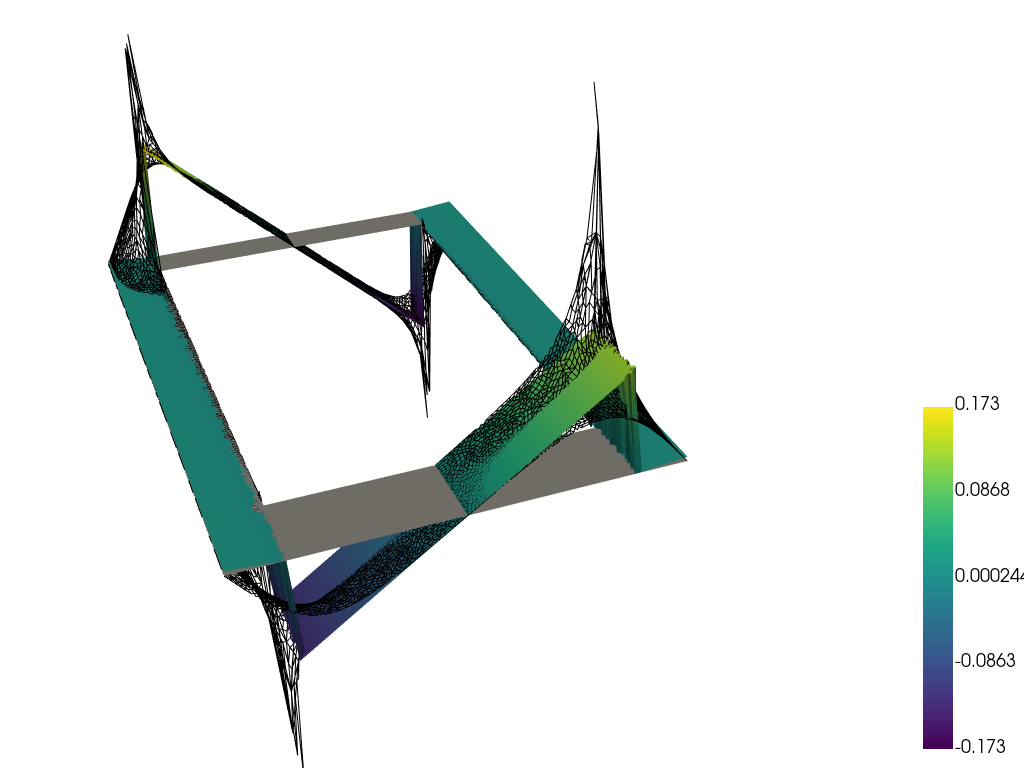

In [30]:
vertices2 = vertices.copy()

s = case1.get_stress()[0]["sig_zx_vy"]#
vertices2[:, -1] += s * 400
point_cloud2 = pv.PolyData(vertices2, triangles)
point_cloud2['stress'] = s

y = vertices[:, 0].copy()
cy = -sec.get_c()[0]
y -= sec.get_c()[0]

Sy = np.zeros_like(y)
mask = (y >= 75)
Sy[mask] = (112500 + 4500 * (y[mask] - 100))
mask = (y < 75) & (y >= 0) & (z > 145)
Sy[mask] = -(310000 + 3100 * (y[mask] - 100))
mask = (y < 75) & (y >= 0) & (z < -95)
Sy[mask] = (460000 + 4600 * (y[mask] - 100))
mask = (y <= -75)
Sy[mask] = (112500 - 4500 * (y[mask] + 100))
mask = (y > -75) & (y <= 0) & (z > 145)
Sy[mask] = (310000 - 3100 * (y[mask] + 100))
mask = (y > -75) & (y <= 0) & (z < -95)
Sy[mask] = -(460000 - 4600 * (y[mask] + 100))

b = np.zeros_like(y)
mask = (y >= 75)
b[mask] = 300
mask = (y < 75) & (y > 0) & (z > 145)
b[mask] = 20
mask = (y < 75) & (y > 0) & (z < -95)
b[mask] = 40
mask = (y <= -75)
b[mask] = 300
mask = (y > -75) & (y < 0) & (z > 145)
b[mask] = 20
mask = (y > -75) & (y < 0) & (z < -95)
b[mask] = 40

Iy = sec.get_ic()[0]
tau = Vy * Sy / Iy / b
vertices3 = vertices.copy()
vertices3[:, -1] += tau * 400
point_cloud3 = pv.PolyData(vertices3, triangles)
point_cloud3['stress'] = tau

pl = pv.Plotter()
pl.add_mesh(point_cloud1, color='grey')
pl.add_mesh(point_cloud2, color='black', style='wireframe')
#pl.add_mesh(point_cloud2, scalars=s)
pl.add_mesh(point_cloud3, scalars=tau)

pl.camera_position = [(-55.098554217723574, -448.39974780144115, 340.9301130755406),
 (89.42788462791617, -78.8973972906223, 107.05754270644749),
 (0.20409194311270598, 0.4653180646682513, 0.8612929684200801)]

pl.show()